# House Price Prediction

This checklist can guide you through your Machine Learning projects. The major steps :
1. Frame the problem.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

### Problem and Description about the data 
###### build a model of housing prices in California using the California census data. 
- This data has features such as the population, median income, median housing price, and so on for each block group in California.(Blockgroups are the smallest geographical unit for which the US Census Bureau publishes sample data (a blockgroup typically has a population of 600 to 3,000 people)). 
- Our model should learn from this data and be able to predict the median housing price in any district,given all the other features.

### Frame the Business Problem

- Know what exactly is the business objective
- building a model is probably not the end goal
- How does the company expect to use and benefit from this model
         - it will determine how you frame the problem
         - what algorithms you will select
         - what performance measure you will use to evaluate your model
         - and you will get to know how much effort that you want to put to get better results
- It fed to other system along with many other signals.
- This system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.


- The next question to ask is what the current solution looks like
  - It will often give you a reference performance
  -  insights on how to solve the problem
- May be they are using traditional complex rules to calculate housing price and some times it may not provide accurate results and thst is costly as well
- Even if they find the values, they often realize it more than 10 % away from the actual
- This is why the company thinks that it would be useful to train a model to predict a district’s median housing price given other data about that district.

## ALL SET

- Frame It:Where it actually lies?

## Select a Performance Measure

- Select a performance measure for your problem
- A typical regression PM is Root Mean Squared Error(RMSE)
- It gives an idea of how much error the system typically makes in its predictions
- with a higher weight for large errors

- m is the number of instances in the dataset you are measuring the RMSE
- x^(i) is a vector of all the feature values (excluding the label) of the ith instance in the dataset
- y^(i) is label

In [76]:
import pandas as pd

In [77]:
data = pd.read_csv('housing.csv')

In [78]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [79]:
df_1 = data[0:1].T

In [80]:
df_1.T

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


### Check the Assumptions

- Look at the assumptions

## Get The Data

#### Get the data and the glimpse of the data

In [81]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [82]:
data.shape

(20640, 10)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Init Process

##### Take a Quick Look at the Data Structure

In [85]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. There are 10 attributes (you can see the first 6 in the screenshot):
longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population,
households, median_income, median_house_value, and ocean_proximity

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- here are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning
standards, but it’s perfect to get started
- Notice that the total_bedrooms attribute has only 20,433 non null values, meaning that 207 districts are missing this feature
- All attributes are numerical, except the ocean_proximity field. Its type is object
- values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute



In [87]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The describe() method shows a summary of the numerical attributes

In [90]:
data[data["total_rooms"]<=10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY


In [73]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for
example, count of total_bedrooms is 20,433, not 20,640)
- The std row shows the standard deviation, which measures how dispersed the values are
- percentile
- 

- Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each
numerical attribute
- A histogram shows the number of instances (on the vertical axis) that have a given
value range (on the horizontal axis)
- You can either plot this one attribute at a time, or you can call the
hist() method on the whole dataset, and it will plot a histogram for each numerical attribute 

In [12]:
import matplotlib.pyplot as plt

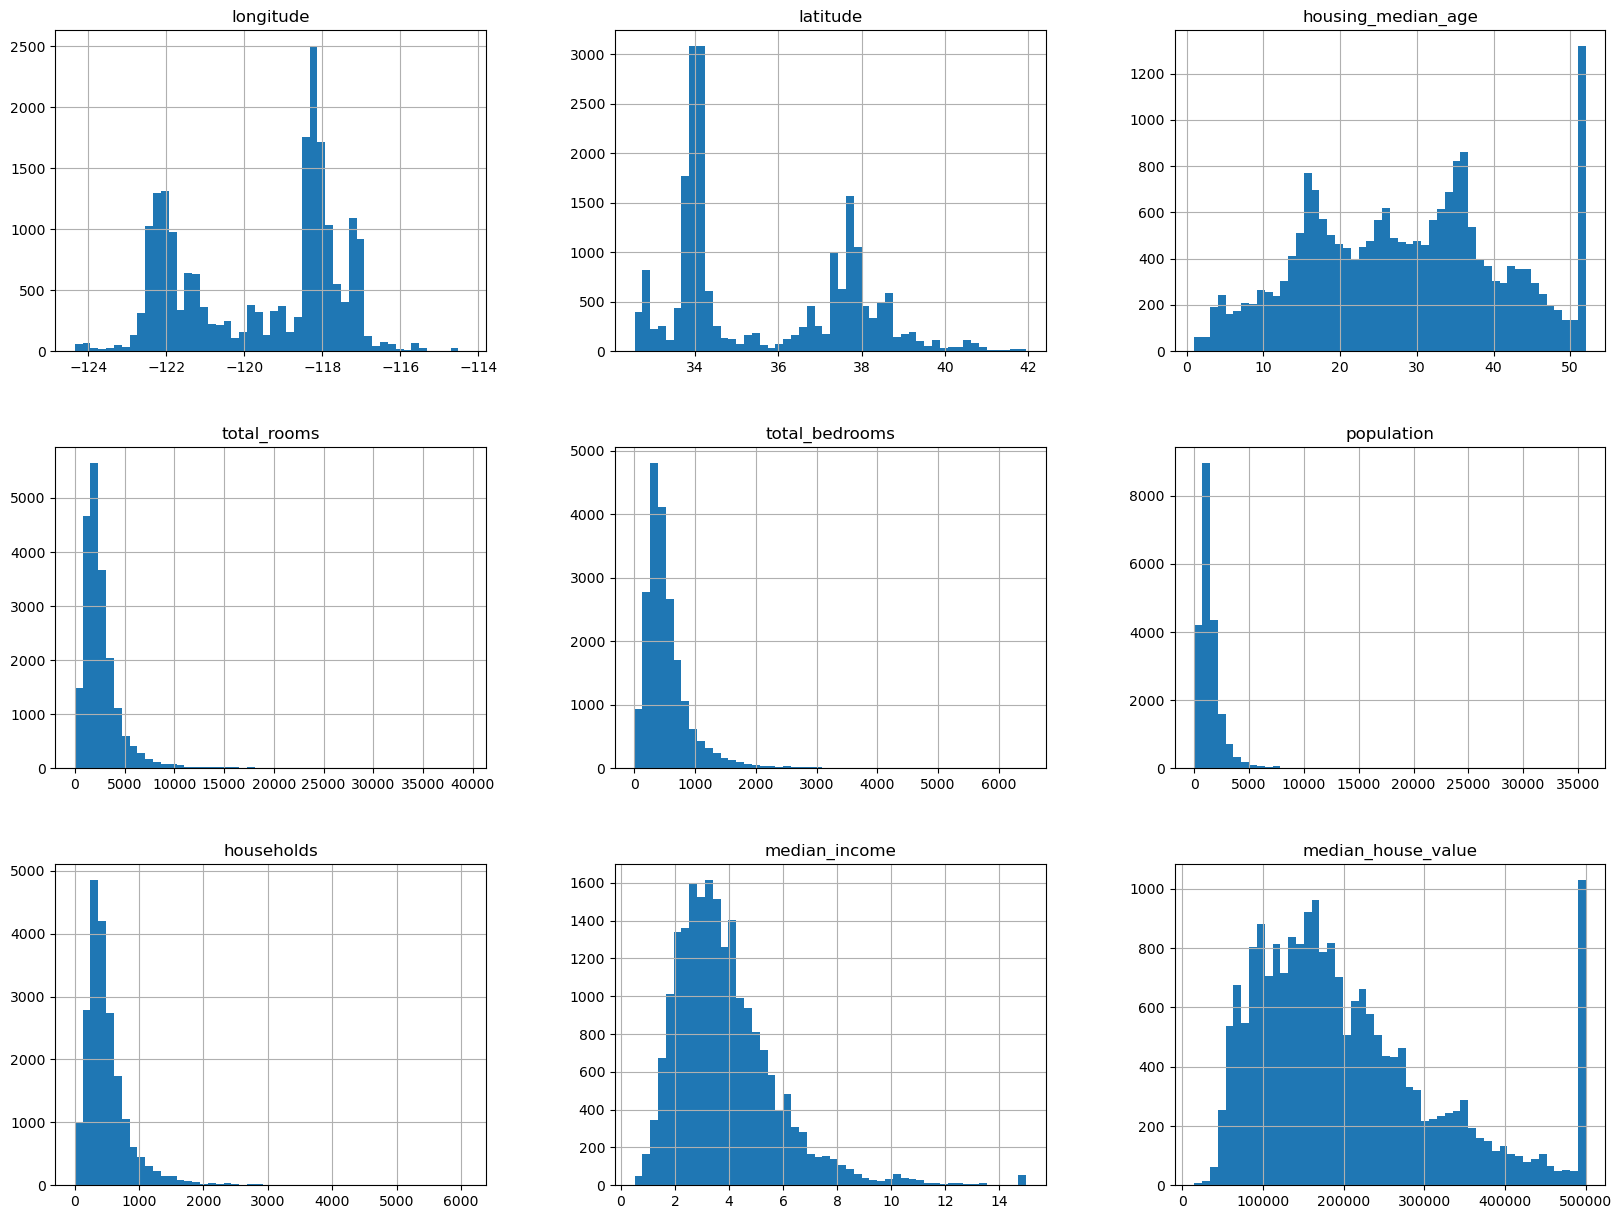

In [13]:
data.hist(bins=50,figsize=(20,15))
plt.show()

### Note
- First, the median income attribute does not look like it is expressed in US dollars (USD). After
checking with the team that collected the data, you are told that the data has been scaled and capped
at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median
incomes. Working with preprocessed attributes is common in Machine Learning, and it is not
necessarily a problem, but you should try to understand how the data was computed.

- The housing median age and the median house value were also capped. The latter may be a serious
problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn
that prices never go beyond that limit. You need to check with your client team (the team that will use
your system’s output) to see if this is a problem or not. If they tell you that they need precise
predictions even beyond $500,000, then you have mainly two options

    - Collect proper labels for the districts whose labels were capped
    - Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000)
 
- These attributes have very different scales. We will discuss this later in this chapter when we
explore feature scaling

- Finally, many histograms are tail heavy: they extend much farther to the right of the median than to
the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We
will try transforming these attributes later on to have more bell-shaped distributions

Hopefully you now have a better understanding of the kind of data you are dealing with.


### Create a Test Set

- It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a
quick glance at the data, and surely you should learn a whole lot more about it before you decide what
algorithms to use, right?
- This is true, but your brain is an amazing pattern detection system, which means
that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly
interesting pattern in the test data that leads you to select a particular kind of Machine Learning model.
- When you estimate the generalization error using the test set, your estimate will be too optimistic and you
will launch a system that will not perform as well as expected. This is called data snooping bias
- Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the
dataset, and set them aside:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_set,test_set = train_test_split(data,test_size=0.2,random_state=42)

Well, this works, but it is not perfect: if you run the program again, it will generate a different test set!
Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which is what
you want to avoid.

In [16]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [17]:
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


- So far we have considered purely random sampling methods. This is generally fine if your dataset is large
enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a
significant sampling bias.

- Gymnatium at College
- For example, the US population is composed of 51.3%
female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the
sample: 513 female and 487 male. This is called stratified sampling
- the population is divided into
homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to
guarantee that the test set is representative of the overall population

-  If they used purely random sampling,
there would be about 12% chance of sampling a skewed test set with either less than 49% female or more
than 54% female. Either way, the survey results would be significantly biased

- Suppose you chatted with experts who told you that the median income is a very important attribute to
predict median housing prices
- You may want to ensure that the test set is representative of the various
categories of incomes in the whole dataset
- Since the median income is a continuous numerical attribute,
you first need to create an income category attribute
- Let’s look at the median income histogram more
closely (see Figure 2-8): most median income values are clustered around $20,000–$50,000, but some
median incomes go far beyond $60,000
- It is important to have a sufficient number of instances in your
dataset for each stratum, or else the estimate of the stratum’s importance may be biased.
- This means that
you should not have too many strata, and each stratum should be large enough.
- The following code creates
an income category attribute by dividing the median income by 1.5 (to limit the number of income
categories), and rounding up using ceil (to have discrete categories), and then merging all the categories
greater than 5 into category 5

In [18]:
house = data.copy()

In [19]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
house['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [21]:
import numpy as np

In [22]:
house['income_cat'] =  np.ceil(house['median_income']/1.5)
house['income_cat'].where(house['income_cat'] < 5, 5.0,inplace=True)

In [23]:
house.income_cat

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [24]:
import seaborn as sns

In [25]:
sns.set_style('darkgrid')

<AxesSubplot:>

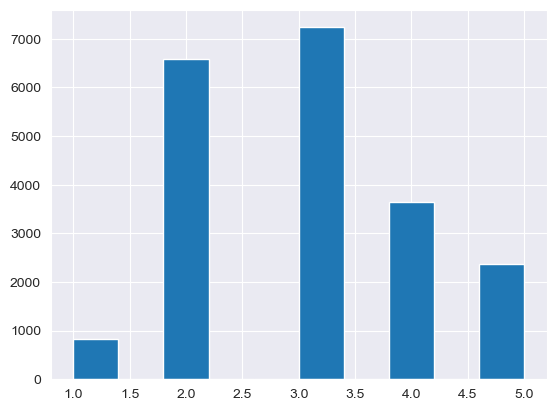

In [26]:
house.income_cat.hist()

Now you are ready to do stratified sampling based on the income category. For this you can use ScikitLearn’s StratifiedShuffleSplit class:

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)


In [29]:
print(split)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


In [92]:
for train_index,test_index in split.split(house,house['income_cat']):
#     print(train_index)
#     print(test_index)
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]

In [94]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3.0


In [31]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


Let’s see if this worked as expected. You can start by looking at the income category proportions in the
full housing dataset:


In [108]:
train1,test1 = train_test_split(house,test_size=0.2,random_state=42)

In [109]:
house['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [110]:
house['income_cat'].value_counts(normalize=True)


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

- With similar code you can measure the income category proportions in the test set. Figure 2-10 compares
the income category proportions in the overall dataset, in the test set generated with stratified sampling,
and in a test set generated using purely random sampling.
- As you can see, the test set generated using
stratified sampling has income category proportions almost identical to those in the full dataset, whereas
the test set generated using purely random sampling is quite skewed.

In [107]:
train1["income_cat"].value_counts(normalize=True)

3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64

In [106]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4.0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3.0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3.0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3.0


In [34]:
strat_test_set.income_cat.value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [35]:
test_set.median_income.value_counts()/len(house)

4.0000    0.000824
3.8750    0.000533
2.8750    0.000533
3.5000    0.000484
1.6250    0.000484
            ...   
4.0229    0.000048
5.7979    0.000048
5.2113    0.000048
2.2328    0.000048
3.5521    0.000048
Name: median_income, Length: 3412, dtype: float64

In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [37]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


We spent quite a bit of time on test set generation for a good reason: this is an often neglected but critical
part of a Machine Learning project. Moreover, many of these ideas will be useful later when we discuss
cross-validation. Now it’s time to move on to the next stage: exploring the data.

### Discover and Visualize the Data to Gain Insights

First, make sure you have put the test set aside and you are only exploring the training set. Also, if the
training set is very large, you may want to sample an exploration set, to make manipulations easy and fast.
In our case, the set is quite small so you can just work directly on the full set. Let’s create a copy so you
can play with it without harming the training set:

In [38]:
housing = strat_train_set.copy()

In [39]:
strat_housing = strat_train_set.copy()

In [40]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [41]:
housing.shape

(16512, 10)

## Visualizing Geographical Data

In [42]:
plt.rcParams["figure.figsize"] = (12, 10)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

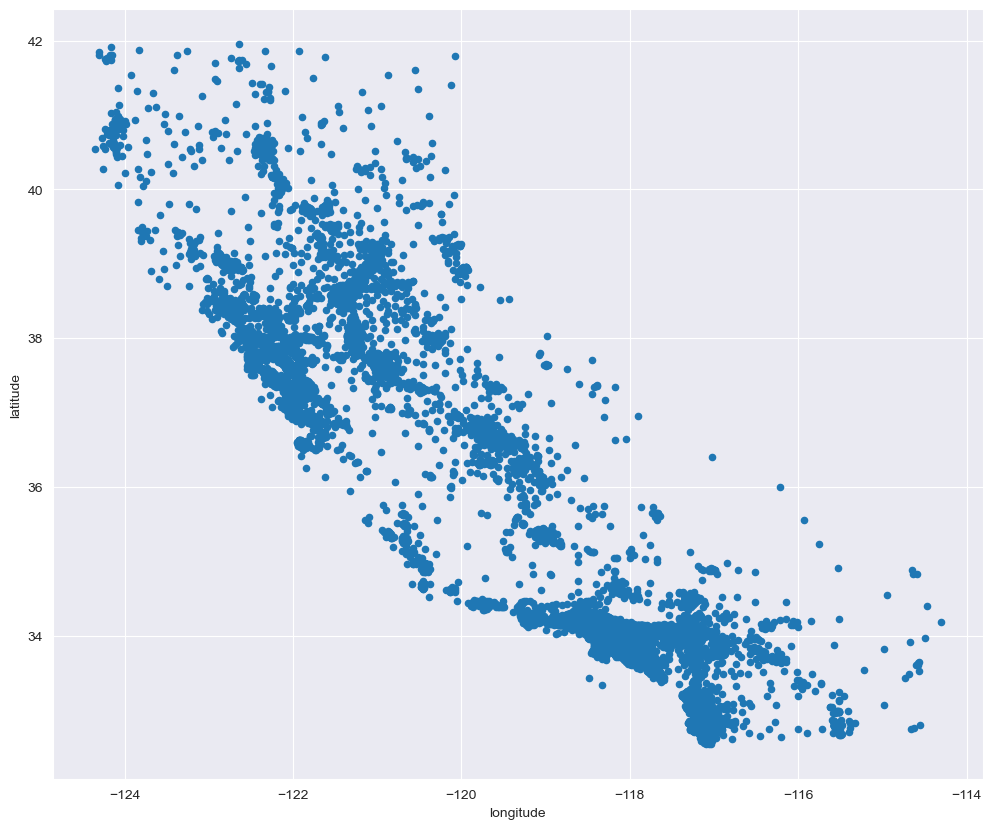

In [43]:
housing.plot(kind='scatter',x='longitude',y='latitude')


This looks like California all right, but other than that it is hard to see any particular pattern. Setting the
alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data
points

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

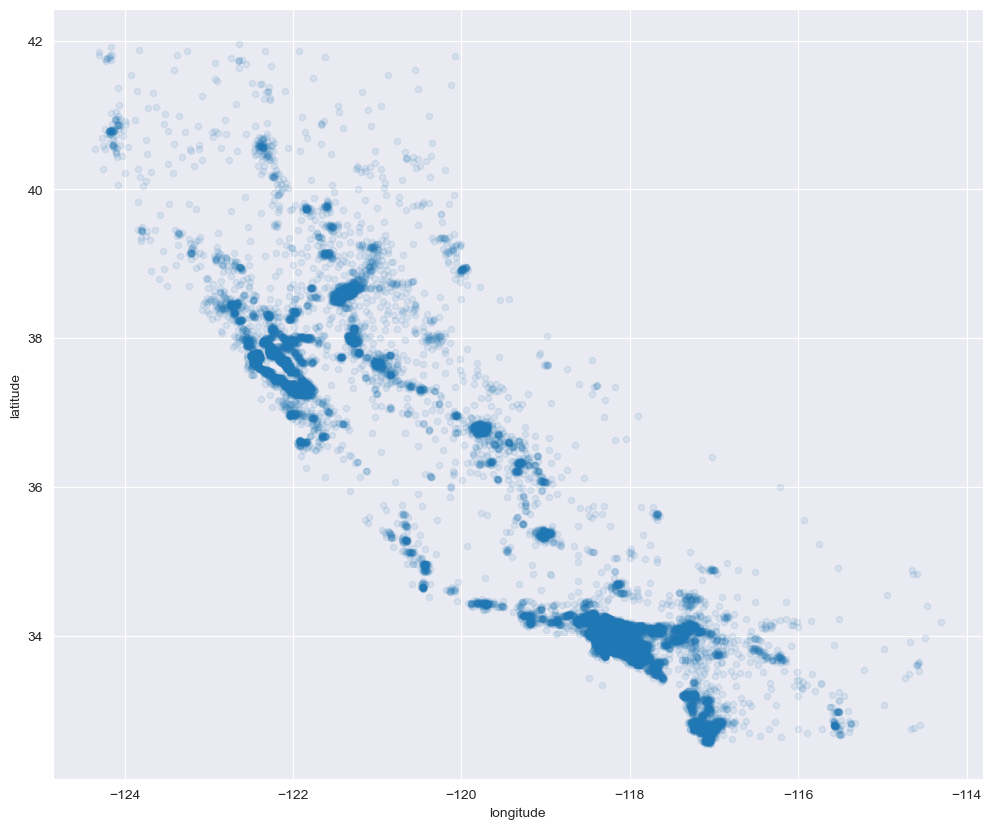

In [44]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

Now that’s much better: you can clearly see the high-density areas, namely the Bay Area and around Los
Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around
Sacramento and Fresno

Now let’s look at the housing prices (Figure 2-13). The radius of each circle represents the district’s
population (option s), and the color represents the price (option c). We will use a predefined color map
(option cmap) called jet, which ranges from blue (low values) to red (high prices):

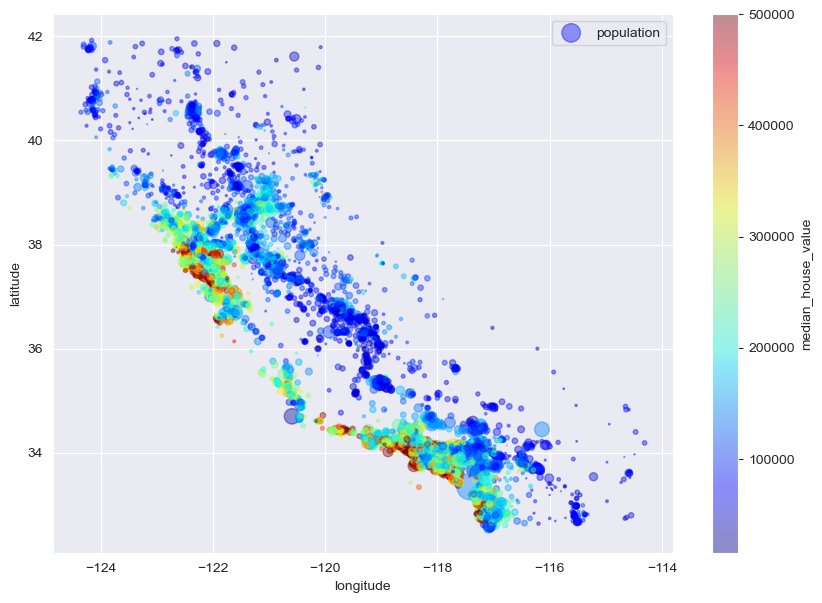

In [45]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing['population']/100,label='population',figsize=(10,7),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,)
plt.legend()

- This image tells you that the housing prices are very much related to the location (e.g., close to the ocean)
and to the population density, as you probably knew already

- in Northern California the housing prices in coastal districts are not too high

### Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also
called Pearson’s r) between every pair of attributes using the corr() method:

In [111]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000


Now let’s look at how much each attribute correlates with the median house value:

In [47]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong
positive correlation; for example, the median house value tends to go up when the median income goes up.

- When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a
small negative correlation between the latitude and the median house value (i.e., prices have a slight
tendency to go down when you go north). 
- Finally, coefficients close to zero mean that there is no linear
correlation.

We do have another way to know the correlation

In [48]:
from pandas.plotting import scatter_matrix

In [49]:
attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
]

In [113]:
scatter_matrix(housing[attributes],figsize=(15,10)):

SyntaxError: invalid syntax (964462752.py, line 1)

The main diagonal (top left to bottom right) would be full of straight lines if Pandas plotted each variable
against itself, which would not be very useful. So instead Pandas displays a histogram of each attribute

The most promising attribute to predict the median house value is the median income, so let’s zoom in on
their correlation scatterplot

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

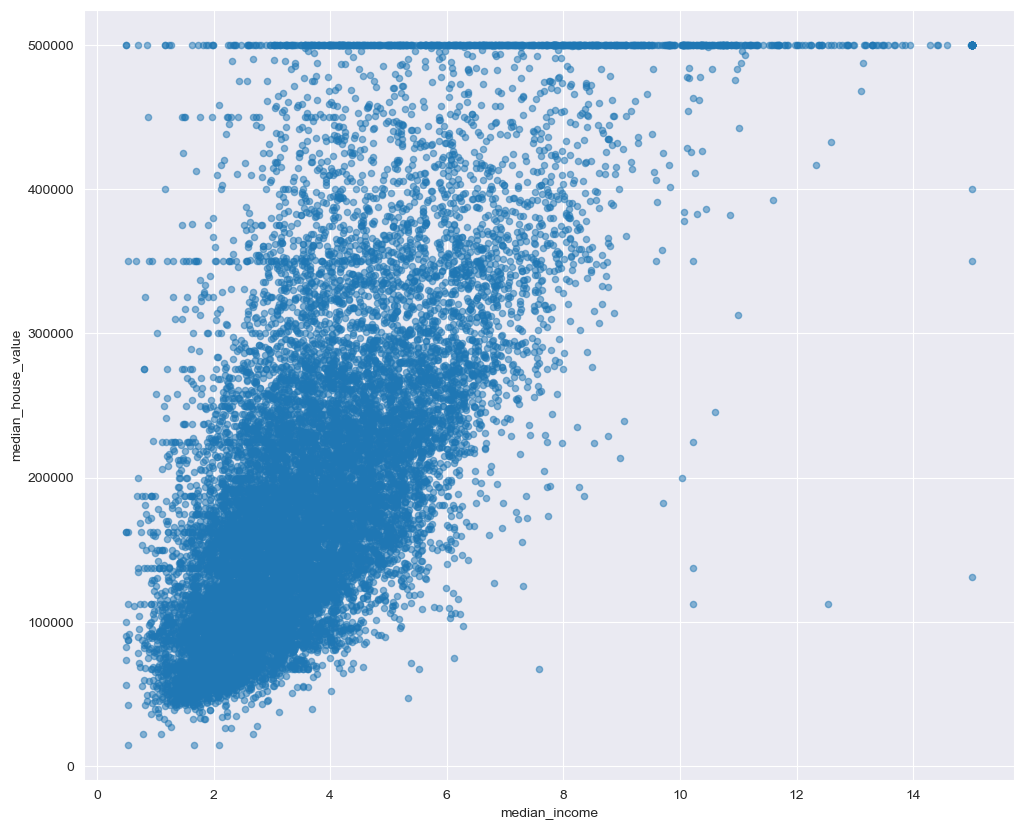

In [51]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.5)

- This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed
- Second, the price cap that we noticed earlier is clearly visible as a horizontal line at $500,000.

- But this plot reveals other less obvious straight lines: a horizontal line around $450,000, another around $350,000,
 perhaps one around $280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms from learning to
reproduce these data quirks.


### Experimenting with Attribute Combinations

-  You identified a few data quirks that you may want to clean up before feeding the data to a
Machine Learning algorithm, and you found interesting correlations between attributes, in particular with
the target attribute
- You also noticed that some attributes have a tail-heavy distribution, so you may want
to transform them (e.g., by computing their logarithm). Of course, your mileage will vary considerably
with each project, but the general ideas are similar.
- One last thing you may want to do before actually preparing the data for Machine Learning algorithms is
to try out various attribute combinations
- For example, the total number of rooms in a district is not very
useful if you don’t know how many households there are
- What you really want is the number of rooms
per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to
compare it to the number of rooms. And the population per household also seems like an interesting
attribute combination to look at. Let’s create these new attributes:


In [52]:
housing['rooms_per_hh'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['poplulation_per_hh'] = housing['population']/housing['households']

In [53]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_hh,bedrooms_per_room,poplulation_per_hh
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [54]:
corr_matrix = housing.corr()

In [55]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
rooms_per_hh          0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
poplulation_per_hh   -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_per_room    -0.259952
Name: median_house_value, dtype: float64

- Hey, not bad! The new bedrooms_per_room attribute is much more correlated with the median house
value than the total number of rooms or bedrooms
- Apparently houses with a lower bedroom/room ratio
tend to be more expensive
- The number of rooms per household is also more informative than the total
number of rooms in a district — obviously the larger the houses, the more expensive they are.
- This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot
and quickly gain insights that will help you get a first reasonably good prototype. But this is an iterative
process: once you get a prototype up and running, you can analyze its output to gain more insights and
come back to this exploration step

## Prepare the Data for Machine Learning Algorithms

It’s time to prepare the data for your Machine Learning algorithms. Instead of just doing this manually, you
should write functions to do that, for several good reasons

- This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you
get a fresh dataset).
- You will gradually build a library of transformation functions that you can reuse in future projects.
- You can use these functions in your live system to transform the new data before feeding it to your
algorithms
- This will make it possible for you to easily try various transformations and see which combination
of transformations works best

But first let’s revert to a clean training set (by copying strat_train_set once again), and let’s separate
the predictors and the labels since we don’t necessarily want to apply the same transformations to the
predictors and the target values (note that drop() creates a copy of the data and does not affect
strat_train_set)

In [56]:
housing = strat_train_set.drop('median_house_value',axis=1)

In [57]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [58]:
housing_labels = strat_train_set.median_house_value.copy()

In [59]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

### Data Cleaning

In [60]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to
take care of them. You noticed earlier that the total_bedrooms attribute has some missing values, so
let’s fix this. You have three options:

- Get rid of the corresponding districts.
- Get rid of the whole attribute
- Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna() methods


Scikit-Learn provides a handy class to take care of missing values: Imputer. Here is how to use it. First,
you need to create an Imputer instance, specifying that you want to replace each attribute’s missing
values with the median of that attribute

In [61]:
from sklearn.impute import SimpleImputer

In [62]:
imputer = SimpleImputer(strategy='median')

In [63]:
imputer

SimpleImputer(strategy='median')

Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity

In [64]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [65]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


Now you can fit the imputer instance to the training data using the fit() method:

In [66]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its statistics_
instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that
there won’t be any missing values in new data after the system goes live, so it is safer to apply the
imputer to all the numerical attributes:

In [67]:
housing_num.shape

(16512, 8)

In [68]:
housing_num['housing_median_age'],median()

NameError: name 'median' is not defined

In [ ]:
imputer.statistics_

Now you can use this “trained” imputer to transform the training set by replacing missing values by the
learned medians:

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
X

The result is a plain Numpy array containing the transformed features. If you want to put it back into a
Pandas DataFrame, it’s simple:

In [ ]:
housing_tr = pd.DataFrame(X,columns = housing_num.columns)

In [ ]:
housing_tr

In [ ]:
housing.isnull().sum()

In [ ]:
housing_tr.isnull().sum()

### SCIKIT-LEARN DESIGN

Estimators --- fit()

Transformers -- transform()

Predictor --- predict()

- Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is
an estimator). The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter (or two
for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the
estimation process is considered a hyperparameter (such as an imputer’s strategy), and it must be set as an instance
variable (generally via a constructor parameter).
- Some estimators (such as an imputer) can also transform a dataset; these are called transformers. Once
again, the API is quite simple: the transformation is performed by the transform() method with the dataset to transform as
a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the
case for an imputer. All transformers also have a convenience method called fit_transform() that is equivalent to calling
fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).
- Finally, some estimators are capable of making predictions given a dataset; they are called predictors. For
example, the LinearRegression model in the previous chapter was a predictor: it predicted life satisfaction given a
country’s GDP per capita. A predictor has a predict() method that takes a dataset of new instances and returns a dataset
of corresponding predictions. It also has a score() method that measures the quality of the predictions given a test set (and
the corresponding labels in the case of supervised learning algorithms).

### Handling Text and Categorical Attributes

Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot
compute its median. Most Machine Learning algorithms prefer to work with numbers anyway, so let’s
convert these text labels to numbers.
Scikit-Learn provides a transformer for this task called LabelEncoder:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
housing.ocean_proximity.unique()

In [ ]:
encoder = LabelEncoder()

In [ ]:
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

In [ ]:
encoder.classes_

In [ ]:
housing.ocean_proximity

- One issue with this representation is that MLalgorithms will assume that two nearby values are more
similar than two distant values
- Obviously this is not the case (for example, categories 0 and 4 are more
similar than categories 0 and 1).
- To fix this issue, a common solution is to create one binary attribute per
category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another
attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot
encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold)

Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot
vectors. Let’s encode the categories as one-hot vectors. Note that fit_transform() expects a 2D array,
but housing_cat_encoded is a 1D array, so we need to reshape it:

#one hot encoder === it recives only 2 d values

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
housing_cat_encoded.ndim

In [ ]:
encoder =OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [ ]:
housing_cat_1hot

- Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you
have categorical attributes with thousands of categories.
- After one-hot encoding we get a matrix with
thousands of columns, and the matrix is full of zeros except for one 1 per row
- Using up tons of memory
mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the
nonzero elements
- You can use it mostly like a normal 2D array,
but if you really want to convert it to a
(dense) NumPy array, just call the toarray() method:


In [ ]:
housing_cat_1hot.toarray()

## Feature Scaling

- One of the most important transformations you need to apply to your data is feature scaling. With few
exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have
very different scales
- This is the case for the housing data: the total number of rooms ranges from about 6
to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is
generally not required.
- There are two common ways to get all attributes to have the same scale: min-max scaling and
standardization.

- Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled
so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max
minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a
feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

- Standardization is quite different: first it subtracts the mean value (so standardized values always have a
zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike
min-max scaling, standardization does not bound values to a specific range, which may be a problem for
some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district had a median income
equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–
0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called
StandardScaler for standardization


Alternatively, you can use Scikit-Learn's FunctionTransformer class that lets you easily create a transformer based on a transformation function (thanks to Hanmin Qin for suggesting this code). Note that we need to set validate=False because the data contains non-float values (validate will default to False in Scikit-Learn 0.22

#### Let's create a custom transformer to add extra attributes

In [ ]:
# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(strat_housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]


from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(strat_housing.values)

In [ ]:
# function tranformer -- module

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(strat_housing.columns)+["rooms_per_household", "population_per_household"],
    index=strat_housing.index)
housing_extra_attribs.head()

In [ ]:
housing_num

### 😇Now let's build a pipeline for preprocessing the numerical attributes 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the
last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be
anything you like (as long as they don’t contain double underscores “__”).


In [ ]:
housing_num_tr

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [ ]:
housing_num

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(strat_housing)

In [ ]:
housing_prepared

In [ ]:
housing_prepared.shape

In [ ]:
housing_prepared.tolist()

### Select and train a model

At last! You framed the problem, you got the data and explored it, you sampled a training set and a test set,
and you wrote transformation pipelines to clean up and prepare your data for Machine Learning
algorithms automatically. You are now ready to select and train a Machine Learning model

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(housing_prepared,housing_labels)

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = strat_housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", model.predict(some_data_prepared))

In [ ]:
some_data

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
house['median_house_value'].head()

In [ ]:
some_data_prepared

In [ ]:
df=[[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.]]

In [ ]:
df=np.array(df)

In [ ]:
model.predict(df)

😇Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s
mean_squared_error function

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

### Other Performance measure MAE(mean absolute error)

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

Okay, this is better than nothing but clearly not a great score: most districts’ median_housing_values
range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying.
This is an example of a model underfitting the training data. When this happens it can mean that the
features do not provide enough information to make good predictions, or that the model is not powerful
enough. As we saw in the previous chapter, the main ways to fix underfitting are to select a more
powerful model, to feed the training algorithm with better features, or to reduce the constraints on the
model. This model is not regularized, so this rules out the last option. You could try to add more features
(e.g., the log of the population), but first let’s try a more complex model to see how it does

### Try out various models 

###### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

😂😂Wait, what!? No error at all? Could this model really be absolutely perfect? Of course, it is much more
likely that the model has badly overfit the data. How can you be sure? As we saw earlier, you don’t want
to touch the test set until you are ready to launch a model you are confident about, so you need to use part
of the training set for training, and part for model validation

### Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the train_test_split function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult and it would work fairly well. A great alternative is to use Scikit-Learn’s cross-validation feature. The following code performs K-fold cross-validation: it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

WARNING
Scikit-Learn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -
scores before calculating the square root.

In [ ]:
def display_scores(scores):
    print('scores: ',scores)
    print('scores_mean: ',scores.mean())
    print('scores_std_div: ',scores.std())

In [ ]:
display_scores(tree_rmse_scores)

Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of approximately 71,379, generally ±2,458. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible

😇Let’s compute the same scores for the Linear Regression model just to be sure:

In [ ]:
lin_scores = cross_val_score(model, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

#### Note: we specify n_estimators=10 to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

😛Let’s try one last model now: the RandomForestRegressor. As we will see in Chapter 7, Random
Forests work by training many Decision Trees on random subsets of the features, then averaging out their
predictions. Building a model on top of many other models is called Ensemble Learning, and it is often a
great way to push MLalgorithms even further. We will skip most of the code since it is essentially the
same as for the other models

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels
                                ,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Wow, this is much better: Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data. However, before you dive much deeper in Random Forests, you should try out many other models from various categories of Machine Learning algorithms (several Support Vector Machines with different kernels, possibly a neural network, etc.), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models

In [ ]:
scores = cross_val_score(model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'lin_reg.pkl')

In [ ]:
my_model_load = joblib.load('lin_reg.pkl')

##### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

### Fine-Tune Your Model

😛Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. Let’s
look at a few ways you can do that.

### Grid Search

One way to do that would be to fiddle with the hyperparameters manually, until you find a great
combination of hyperparameter values. This would be very tedious work, and you may not have time to
explore many combinations

Instead you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which
hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the
possible combinations of hyperparameter values, using cross-validation. For example, the following code
searches for the best combination of hyperparameter values for the RandomForestRegressor:


😍When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a
smaller number if you want a more fine-grained search, as shown in this example with the n_estimators hyperparameter).


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and
max_features hyperparameter values specified in the first dict (don’t worry about what these
hyperparameters mean for now; they will be explained in Chapter 7), then try all 2 × 3 = 6 combinations
of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to
False instead of True (which is the default value for this hyperparameter).

ll in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor
hyperparameter values, and it will train each model five times (since we are using five-fold cross
validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long
time, but when it is done you can get the best combination of parameters like this:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Note:If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best estimator using cross-validation, it
retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance.

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In this example, we obtain the best solution by setting the max_features hyperparameter to 8, and the
n_estimators hyperparameter to 30. The RMSE score for this combination is 49,682, which is slightly
better than the score you got earlier using the default hyperparameter values (which was 52,564).
Congratulations, you have successfully fine-tuned your best mode

- Don’t forget that you can treat some of the data preparation steps as hyperparameters. For example, the grid search will
automatically find out whether or not to add a feature you were not sure about (e.g., using the add_bedrooms_per_room
hyperparameter of your CombinedAttributesAdder transformer). It may similarly be used to automatically find the best way to
handle outliers, missing features, feature selection, and more

## Randomized Search


The grid search approach is fine when you are exploring relatively few combinations, like in the previous
example, but when the hyperparameter search space is large, it is often preferable to use
RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class,
but instead of trying out all possible combinations, it evaluates a given number of random combinations
by selecting a random value for each hyperparameter at every iteration. This approach has two main
benefits:

- If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000
different values for each hyperparameter (instead of just a few values per hyperparameter with the
grid search approach)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# param_distribs = {
#         'n_estimators': randint(low=1, high=200),
#         'max_features': randint(low=1, high=8),
#     }

# forest_reg = RandomForestRegressor(random_state=42)
# rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
#                                 n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
# rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
# cvres = rnd_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

### Feature Importance

In [ ]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

😇Let’s display these importance scores next to their corresponding attribute names

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

With this information, you may want to try dropping some of the less useful features

### Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs sufficiently well.
Now is the time to evaluate the final model on the test set. There is nothing special about this process; just
get the predictors and the labels from your test set, run your full_pipeline to transform the data (call
transform(), not fit_transform()!), and evaluate the final model on the test set

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_train_set['median_house_value'].copy()

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
final_model = grid_search.best_estimator_

# X_test = strat_test_set.drop("median_house_value", axis=1)
test_label = strat_test_set["median_house_value"].copy()
#use transform instead of fit_transform
test_prepared = full_pipeline.transform(strat_test_set)
final_predictions = final_model.predict(test_prepared)

final_mse = mean_squared_error(test_label, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
X_test.shape

In [ ]:
final_rmse

- The performance will usually be slightly worse than what you measured using cross-validation if you did
a lot of hyperparameter tuning (because your system ends up fine-tuned to perform well on the validation
data, and will likely not perform as well on unknown datasets). It is not the case in this example, but when
this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good
on the test set; the improvements would be unlikely to generalize to new data.



Alternatively, we could use a z-scores rather than t-scores

In [ ]:
from scipy import stats

In [ ]:
confidence = 0.95
squared_errors = (final_predictions - test_label) ** 2
mean = squared_errors.mean()
m = len(squared_errors)
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

- Now comes the project prelaunch phase: you need to present your solution (highlighting what you have
learned, what worked and what did not, what assumptions were made, and what your system’s limitations
are), document everything, and create nice presentations with clear visualizations and easy-to-remember
statements (e.g., “the median income is the number one predictor of housing prices”)

In [ ]:
housing.head()

In [ ]:
strat_test_set

In [ ]:
model_fin = joblib.load('lin_reg.pkl')

In [ ]:
model_fin.predict([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.]])

In [ ]:
housing['ocean_proximity'].unique()